<a href="https://colab.research.google.com/github/demolakstate/bumble_bees_detection/blob/main/Bee_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/MyDrive/BeeMachine/

/content/gdrive/MyDrive/BeeMachine


In [ ]:
#!git clone https://github.com/tensorflow/models.git

In [4]:
ls

models/


In [5]:
cd /content/gdrive/MyDrive/BeeMachine/models/research

/content/gdrive/MyDrive/BeeMachine/models/research


In [57]:
pwd

'/content/gdrive/MyDrive/BeeMachine/models/research'

## Protobuf Installation/Compilation ##

In [6]:
#!cd /content/gdrive/MyDrive/BeeMachine/

In [7]:
#!wget https://github.com/protocolbuffers/protobuf/releases/download/v3.14.0/protoc-3.14.0-linux-x86_64.zip

In [ ]:
!apt-get install protobuf-compiler

In [7]:
!protoc object_detection/protos/*.proto --python_out=.

In [8]:
!export PYTHONPATH=$PYTHONPATH:'pwd':'pwd'/slim

## COCO API Installation ##

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

In [12]:
cd ./cocoapi/PythonAPI/


/content/gdrive/My Drive/BeeMachine/models/research/cocoapi/PythonAPI/cocoapi/PythonAPI


In [ ]:
!make

In [14]:
!cp -r pycocotools/ /content/gdrive/MyDrive/BeeMachine/models/research

In [15]:
ls

Makefile  pycocoDemo.ipynb  pycocoEvalDemo.ipynb  pycocotools/  setup.py


In [16]:
cd /content/gdrive/MyDrive/BeeMachine/models/research/

/content/gdrive/MyDrive/BeeMachine/models/research


In [17]:
!cp object_detection/packages/tf2/setup.py .


In [ ]:
!python -m pip install .

In [ ]:
ls

In [20]:
cd /content/gdrive/MyDrive/BeeMachine/models/research/

/content/gdrive/MyDrive/BeeMachine/models/research


## Test your installation ##

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

## Create TFRecords ##

In [22]:
cd object_detection/

/content/gdrive/MyDrive/BeeMachine/models/research/object_detection


In [82]:
#!python create_tf_record.py \ --data_dir='pwd' \ --output_dir='pwd'

2021-02-15 22:14:04.347183: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
I0215 22:14:06.357152 140475439368064 create_tf_record.py:153] Reading from Pet dataset.
I0215 22:14:06.358185 140475439368064 create_tf_record.py:170] ['019', '007', '029', '004', '012', '015', '032'] VALIDATION SAMPLES 
I0215 22:14:06.359020 140475439368064 create_tf_record.py:173] 27 training and 7 validation examples.
I0215 22:14:06.360712 140475439368064 create_tf_record.py:134] On image 0 of 27
/usr/local/lib/python3.6/dist-packages/object_detection/utils/dataset_util.py:83: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if not xml:
I0215 22:14:06.454097 140475439368064 create_tf_record.py:134] On image 0 of 7


In [ ]:
ls


## Training the Model ##

In [ ]:
!python model_main_tf2.py --model_dir=ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model --logtostderr --pipeline_config_path=pipeline.config --train_dir=train

## Evaluating the Model ##

In [ ]:
!python model_main_tf2.py --model_dir=ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model --pipeline_config_path=pipeline.config --checkpoint_dir=ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model

## Exporting the Trained Model ##

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path pipeline.config --trained_checkpoint_dir ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model --output_directory exported-models

In [ ]:
!python export_inference_graph.py --input_type=image_tensor --pipeline_config_path=pipeline.config --trained_checkpoint_prefix=ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/ckpt-28 --output_directory=output_inference

## Inferencing with the model ##

In [ ]:
!python inference.py --input_dir=test_images --output_dir=result_images --label_map=annotations/label_map.pbtxt --frozen_graph=ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb --num_output_classes=2

## Load the model ##

In [53]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

import tensorflow as tf


PATH_TO_SAVED_MODEL = "ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 12.91734004020691 seconds


## Load label map data ##

In [54]:
PATH_TO_LABELS = 'annotations/label_map.pbtxt'

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [56]:
IMAGE_PATHS = 'test_bee_images'

In [112]:
import os
filenames = os.listdir('test_bee_images')

In [113]:
filenames

['BBB_Bombus_affinis_2993-6.jpg',
 'BBB_Bombus_affinis_2994-2.jpg',
 'BBB_Bombus_affinis_3043-1.jpg',
 'BBB_Bombus_affinis_2994-3.jpg',
 'BBB_Bombus_affinis_2994-1.jpg',
 'BBB_Bombus_affinis_2993-3.jpg',
 'BBB_Bombus_affinis_2994-4.jpg']

Running inference for test_bee_images/BBB_Bombus_affinis_2994-4.jpg... Done
Running inference for test_bee_images/BBB_Bombus_affinis_2993-6.jpg... Done
Running inference for test_bee_images/BBB_Bombus_affinis_2994-2.jpg... Done
Running inference for test_bee_images/BBB_Bombus_affinis_3043-1.jpg... Done
Running inference for test_bee_images/BBB_Bombus_affinis_2994-3.jpg... Done
Running inference for test_bee_images/BBB_Bombus_affinis_2994-1.jpg... Done
Running inference for test_bee_images/BBB_Bombus_affinis_2993-3.jpg... Done


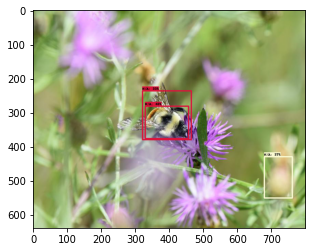

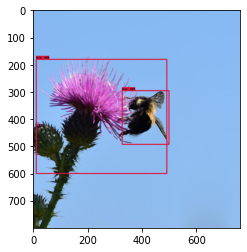

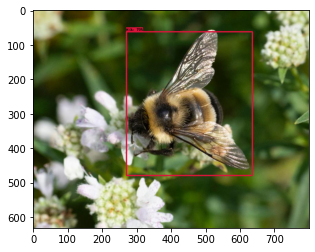

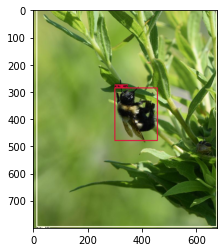

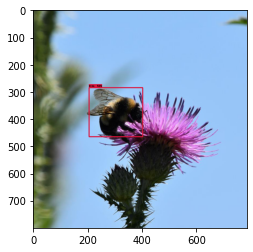

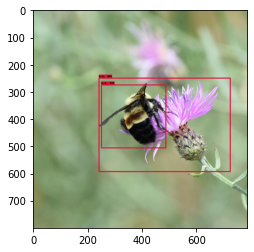

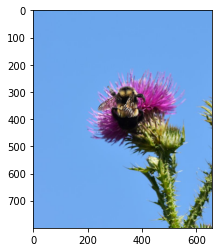

In [119]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

%matplotlib inline

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    #print('path', Image.open(path))
    #print('path', path)
    return np.array(Image.open(path)) # np.array(Image.open(r"test_bee_images/BBB_Bombus_affinis_2993-6.jpg"))


for filename in filenames:

    print('Running inference for {}... '.format(image_path), end='')
    image_path = 'test_bee_images' + '/' + filename

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure()
    #plt.imsave('t1.jpg', image_np_with_detections)
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2